In [ ]:
pip install sentence-transformers scikit-learn matplotlib seaborn numpy

EMBEDDING VECTOR DETAILS

Text 1: 'Harry Potter'
Vector shape: (384,)
Vector dtype: float32
First 10 values: [-0.06422769 -0.00430152 -0.04282691  0.03793846 -0.10789489 -0.01337648
  0.0463733  -0.02006128  0.08278275 -0.0571144 ]
Mean: 0.001121
Std: 0.051019
Min: -0.139833
Max: 0.179643

Text 2: 'Wand'
Vector shape: (384,)
Vector dtype: float32
First 10 values: [-0.04456525  0.00198564 -0.00982396 -0.0109915  -0.10379271 -0.00577052
  0.11572939 -0.01825331  0.02145468 -0.01797702]
Mean: 0.001677
Std: 0.051003
Min: -0.129343
Max: 0.199083

Text 3: 'Square'
Vector shape: (384,)
Vector dtype: float32
First 10 values: [ 0.09228088  0.07878133 -0.02029409  0.05313491 -0.10533219  0.02611403
  0.02906478  0.0120261   0.04497012 -0.06974746]
Mean: 0.001443
Std: 0.051011
Min: -0.147454
Max: 0.217624

Text 4: 'Moon'
Vector shape: (384,)
Vector dtype: float32
First 10 values: [ 9.2148031e-05  3.4934804e-02  4.1344851e-02  6.0127750e-02
 -9.0935603e-02 -4.2241585e-02  6.7362666e-02 -4.3818843e

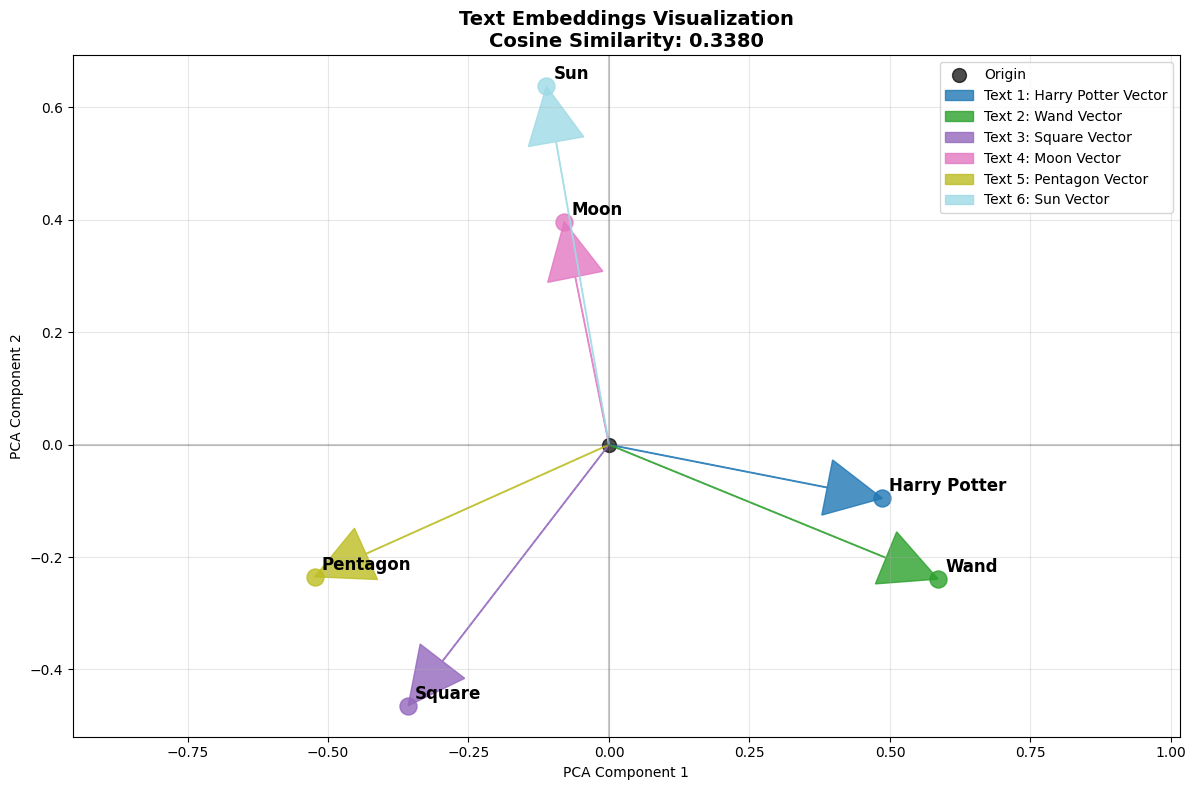


VECTOR INFORMATION:
Harry Potter magnitude: 0.4957
Wand magnitude: 0.6326
Square magnitude: 0.5861
Moon magnitude: 0.4046
Pentagon magnitude: 0.5740
Sun magnitude: 0.6474

Cosine Similarity between all texts: 0.3380


In [21]:
# Code to visualize embeddings of multiple words

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
import seaborn as sns

def get_embeddings_sentence_transformers(texts):
    """Get embeddings using Sentence Transformers"""
    model = SentenceTransformer('all-MiniLM-L6-v2')  # Lightweight model
    embeddings = model.encode(texts)
    return embeddings

def visualize_embeddings(embeddings, texts):
    """Visualize embeddings using PCA for dimensionality reduction"""
    # Reduce dimensions to 2D for visualization
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(embeddings)
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Plot origin point
    plt.scatter(0, 0, color='black', s=100, marker='o', label='Origin', alpha=0.7)
    
    # Example: generate N distinct colors using 'tab20' colormap
    N = len(embeddings_2d)  # or any desired number
    colors = plt.cm.tab20(np.linspace(0, 1, N))  # tab20 supports up to 20 distinct colors

    # Plot the vectors from origin to each point
    for i, (x, y) in enumerate(embeddings_2d):
        # Draw vector arrow from origin to point
        plt.arrow(0, 0, x, y,
                head_width=0.1, head_length=0.1,
                fc=colors[i % len(colors)], ec=colors[i % len(colors)],
                length_includes_head=True, 
                alpha=0.8,
                label=f'Text {i+1}: {texts[i]} Vector')
        plt.scatter(x, y, color=colors[i % len(colors)], s=150, alpha=0.8)
        plt.annotate(f'{texts[i]}', (x, y), xytext=(5, 5),
                    textcoords='offset points', fontsize=12, fontweight='bold')
    
    # Calculate and display cosine similarity across all words in texts list. Modify to compare specific texts
    similarity = np.dot(embeddings[0], embeddings[1]) / (
        np.linalg.norm(embeddings[0]) * np.linalg.norm(embeddings[1])
    )
    
    # Calculate vector magnitudes
    magnitudes = [np.linalg.norm(vec) for vec in embeddings_2d]
    
    plt.title(f'Text Embeddings Visualization\nCosine Similarity: {similarity:.4f}', 
              fontsize=14, fontweight='bold')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.2)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.2)
    plt.legend()
    
    # Set equal aspect ratio for proper vector representation
    plt.axis('equal')
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
    # Print vector information
    print("\nVECTOR INFORMATION:")
    for i, mag in enumerate(magnitudes):
        print(f"{texts[i]} magnitude: {mag:.4f}")
    
    return embeddings_2d, similarity

def display_vector_details(embeddings, texts):
    """Display detailed information about the vectors"""
    print("=" * 60)
    print("EMBEDDING VECTOR DETAILS")
    print("=" * 60)
    
    for i, (text, embedding) in enumerate(zip(texts, embeddings)):
        print(f"\nText {i+1}: '{texts[i]}'")
        print(f"Vector shape: {embedding.shape}")
        print(f"Vector dtype: {embedding.dtype}")
        print(f"First 10 values: {embedding[:10]}")
        print(f"Mean: {np.mean(embedding):.6f}")
        print(f"Std: {np.std(embedding):.6f}")
        print(f"Min: {np.min(embedding):.6f}")
        print(f"Max: {np.max(embedding):.6f}")

# Main execution
if __name__ == "__main__":
    # Example texts - add more here
    texts = ["Harry Potter", "Wand", "Square", "Moon", "Pentagon", "Sun"]
    
    # Get embeddings
    embeddings = get_embeddings_sentence_transformers(texts)
    
    # Display vector details
    display_vector_details(embeddings, texts)
    
    # Visualize embeddings
    embeddings_2d, similarity = visualize_embeddings(embeddings, texts)
    
    print(f"\nCosine Similarity between all texts: {similarity:.4f}")

In [ ]:
# Code to generate single vector
# This uses a dummy text to workaround PCA not having 2 data points

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

def get_embeddings_sentence_transformers(texts):
    model = SentenceTransformer('all-MiniLM-L6-v2')
    return model.encode(texts)

def visualize_single_vector_pca(embedding, label):
    dummy = np.zeros_like(embedding)  # Add dummy vector
    data = np.vstack([embedding, dummy])
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(data)
    x, y = embeddings_2d[0]

    plt.figure(figsize=(6, 6))
    plt.scatter(0, 0, color='black', s=100, label='Origin')
    plt.arrow(0, 0, x, y, head_width=0.1, head_length=0.1,
              fc='red', ec='red', alpha=0.8, length_includes_head=True, label=label)
    plt.scatter(x, y, color='red', s=150)
    plt.annotate(label, (x, y), xytext=(5, 5), textcoords='offset points',
                 fontsize=12, fontweight='bold')

    plt.title(f"Single Text Embedding (PCA): {label}")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.grid(True, alpha=0.3)
    plt.axhline(0, color='k', alpha=0.2)
    plt.axvline(0, color='k', alpha=0.2)
    plt.axis('equal')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    text = "Harry Potter"
    embedding = get_embeddings_sentence_transformers([text])[0]
    visualize_single_vector_pca(embedding, text)
